## Постановка задачи
Задача страхового скоринга: https://www.kaggle.com/c/prudential-life-insurance-assessment

Требуется провести классификацию клиентов по уровню благонадежности для страхования жизни (всего 8 градаций) - Response. Для оценки доступно несколько параметров: виды страховки (Product_Info), возраст (Ins_Age), рост (Ht), вес (Wt), индекс массы тела (BMI), данные о работе (Employment_Info), данные страховки (InsuredInfo), история страхования (Insurance_History), семья (Family_Hist), медицинские данные (Medical_History) и медицинские термины (Medical_Keyword) - всего 126 переменных.

Загрузим данные и исследуем их. Найдем возможные "утечки" и взаимосвязи параметров для построения моделей.

Данные:
* https://video.ittensive.com/machine-learning/prudential/train.csv.gz

© ITtensive, 2020

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 16,8
pd.set_option('display.max_columns', 200)

### Загрузка данных

In [2]:
train = pd.read_csv("https://video.ittensive.com/machine-learning/prudential/train.csv.gz")
print(train.info())
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB
None


,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


### Распределение значений

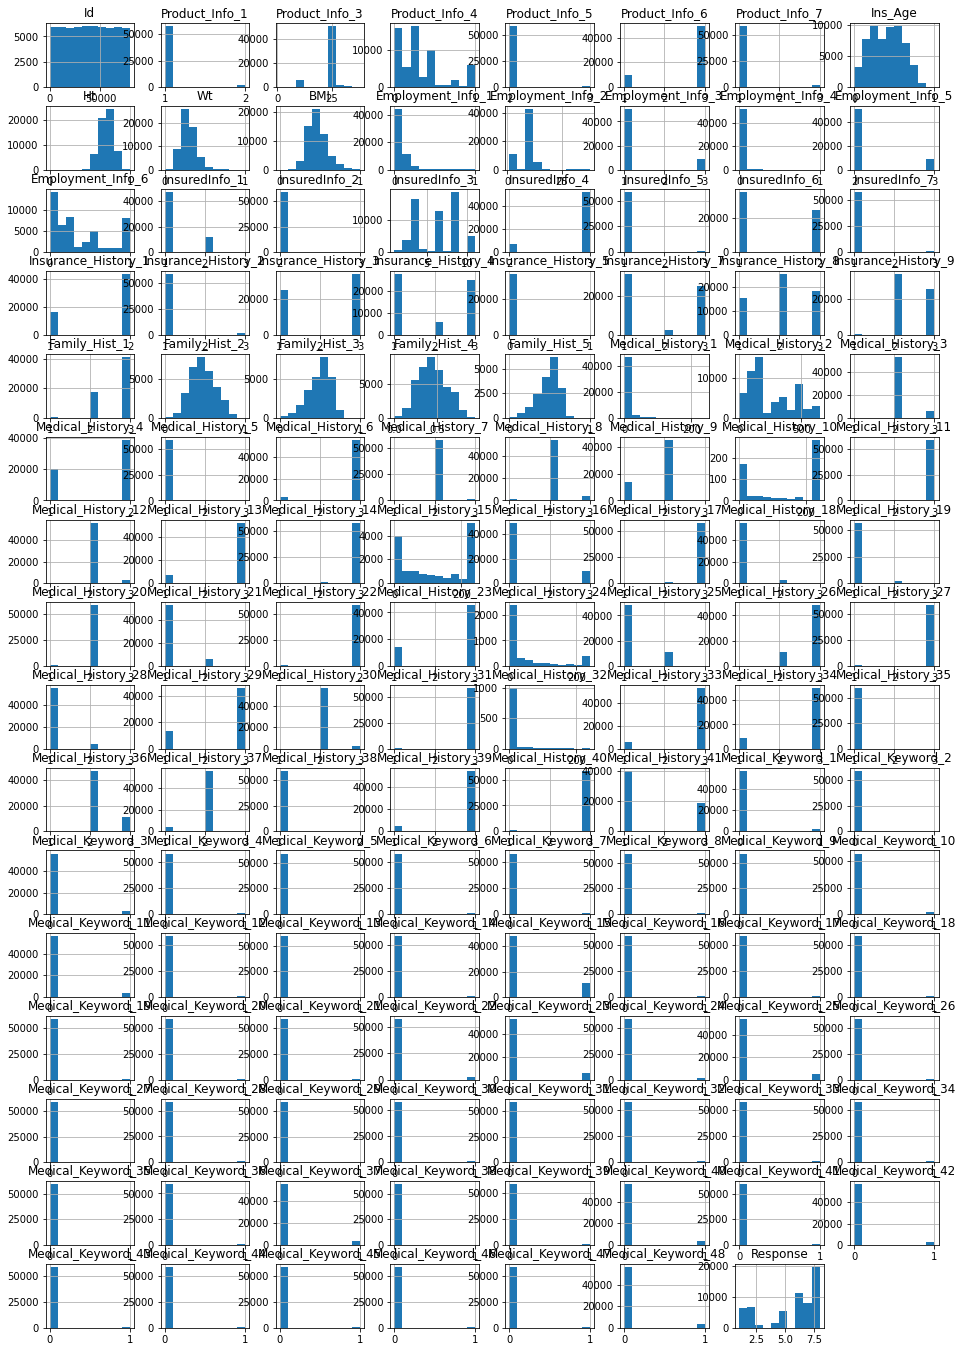

In [3]:
train.hist(figsize=(16, 24), layout=(16, 8));

### Зависимость скоринга от параметров: история страхования

In [4]:
def data_correlation_plot(df, columns):
    rows = int(np.ceil(len(columns) / 4))
    fig = plt.figure(figsize=(12, rows*3))
    i = 1
    for column in columns:
        type_ = str(df[column].dtypes)
        if type_[0:3] == 'int' or type_[0:5] == 'float':
            area = fig.add_subplot(rows, 4, i)
            pd.DataFrame(df, columns=['Response', column]).plot.scatter(x=column, y='Response', ax=area)
            i += 1
    plt.show();

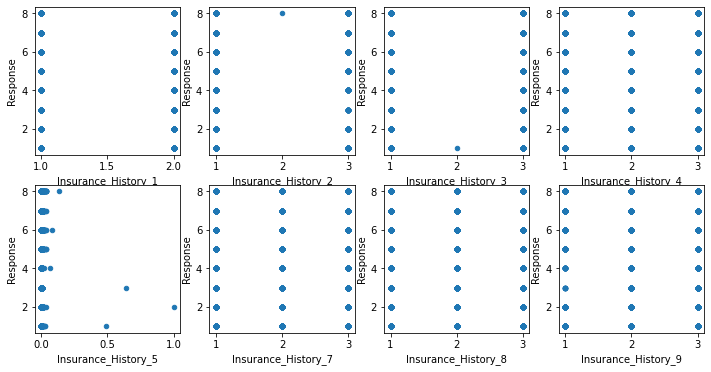

In [5]:
data_correlation_plot(train, train.columns[train.columns.str.startswith('Insurance_History')])

### Зависимость скоринга от параметров: параметры страхования

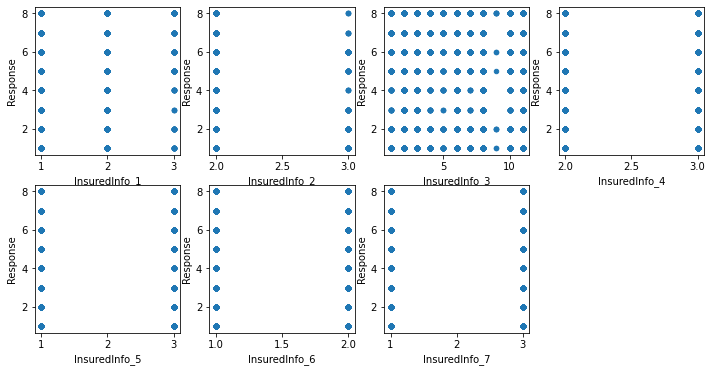

In [6]:
data_correlation_plot(train, train.columns[train.columns.str.startswith('InsuredInfo')])

### Зависимость скоринга от параметров: физиология

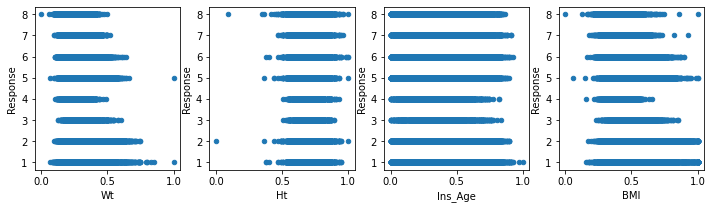

In [7]:
data_correlation_plot(train, ["Wt", "Ht", "Ins_Age", "BMI"])

### Зависимость скоринга от параметров: семья

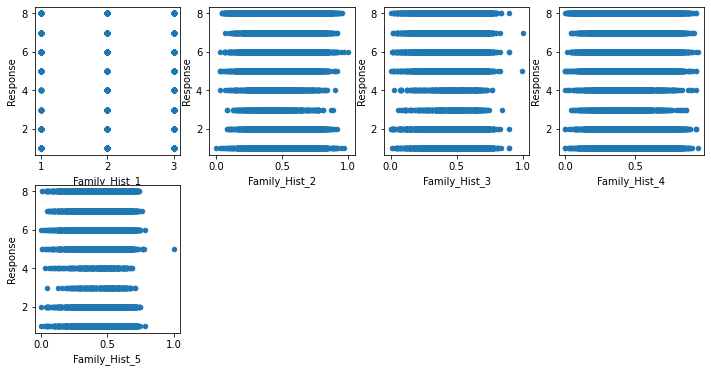

In [8]:
data_correlation_plot(train, train.columns[train.columns.str.startswith('Family_Hist')])

### Зависимость скоринга от параметров: здоровье

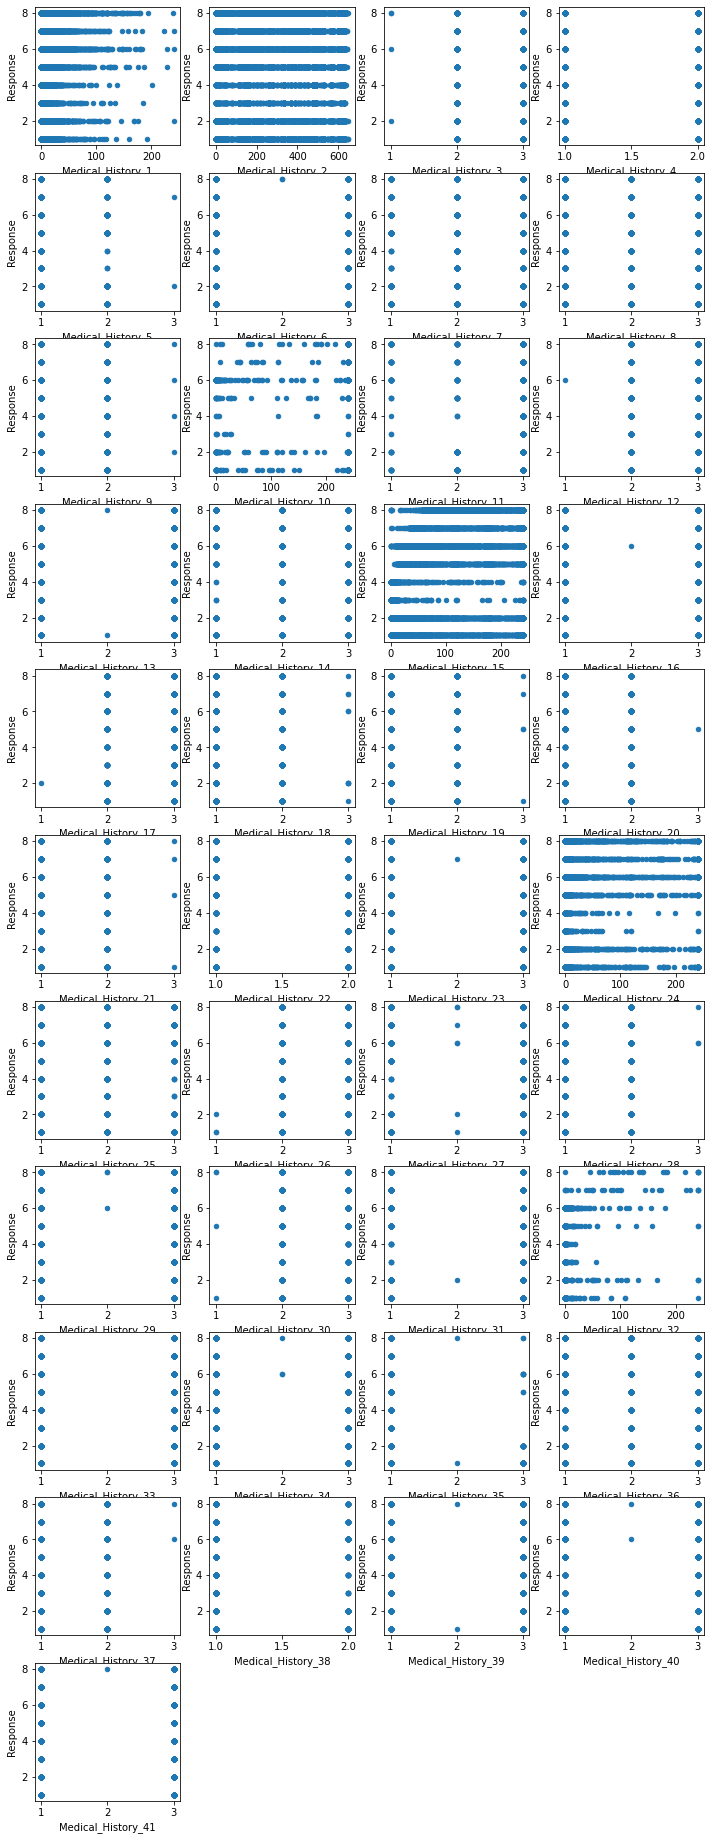

In [9]:
data_correlation_plot(train, train.columns[train.columns.str.startswith('Medical_History')])

### Зависимость скоринга от параметров: страховка

In [10]:
train['Product_Info_2_1'] = train['Product_Info_2'].str.slice(0, 1)
train['Product_Info_2_2'] = train['Product_Info_2'].str.slice(1, 2).astype('int8')
train.drop('Product_Info_2', axis='columns', inplace=True)

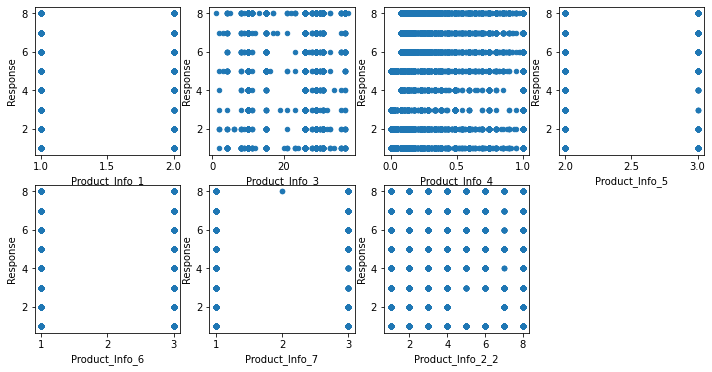

In [11]:
data_correlation_plot(train, train.columns[train.columns.str.startswith('Product_Info')])

### Взаимная корреляция биометрии

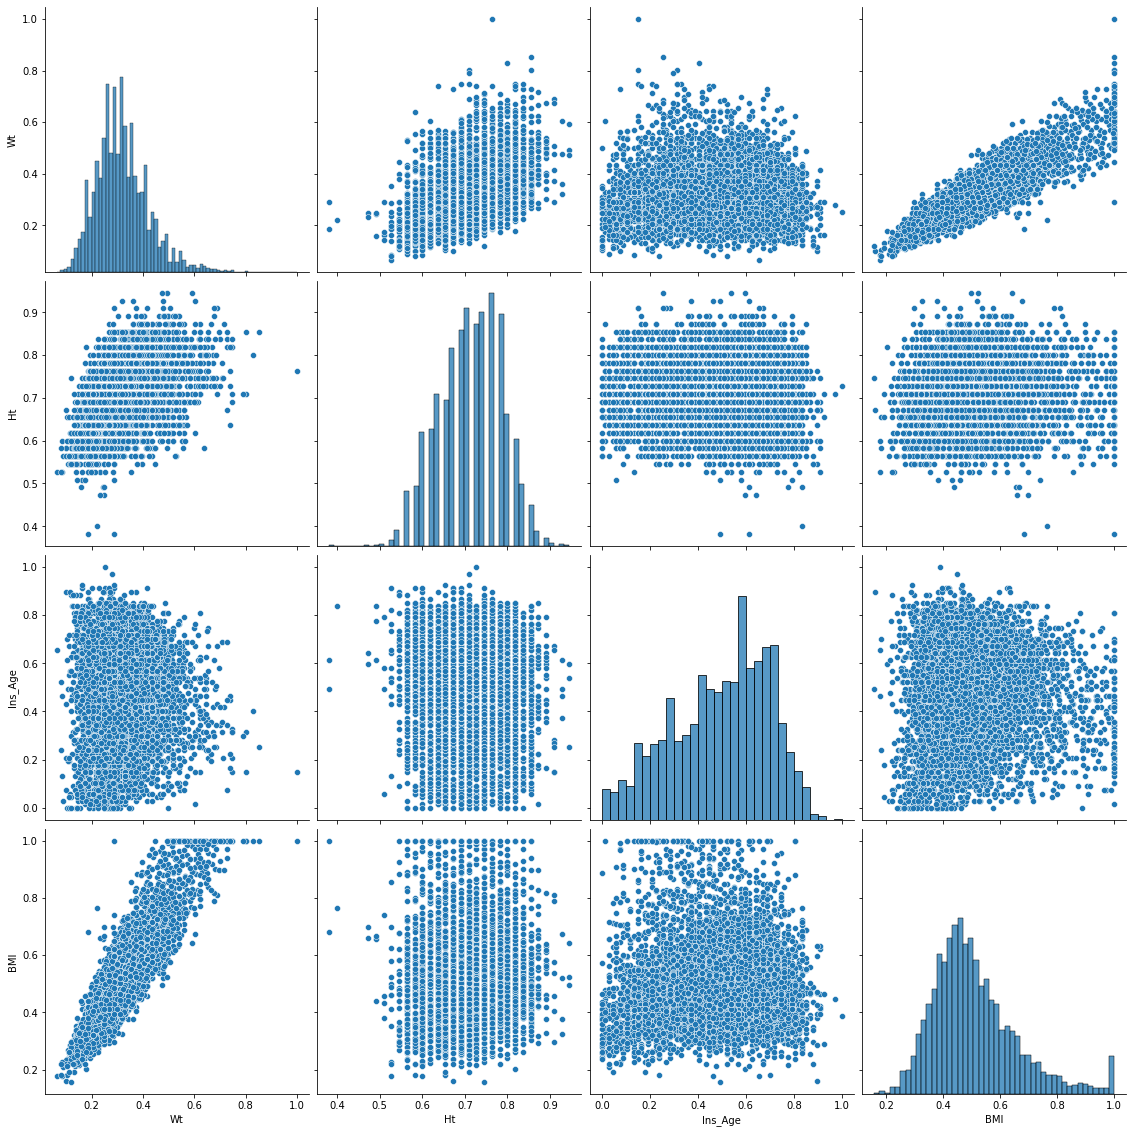

In [13]:
data = train[train['Response'] == 1][["Wt", "Ht", "Ins_Age", "BMI"]]
sns.pairplot(data, height=4);
del data

### Кластеризация по биометрии

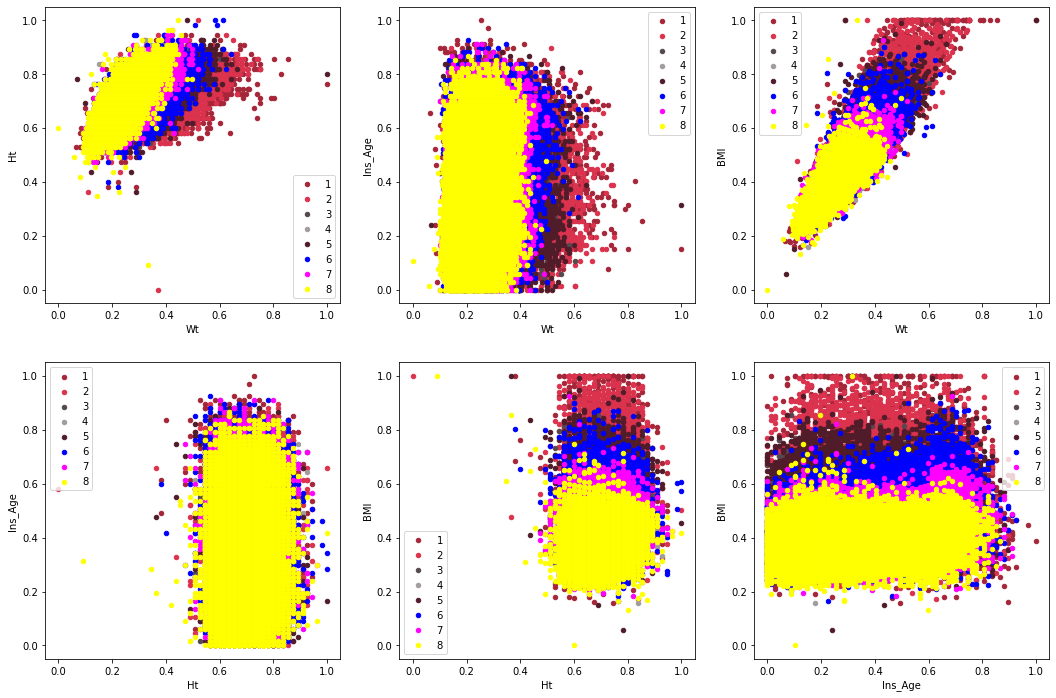

In [14]:
columns_groups = [["Wt", "Ht"], ["Wt", "Ins_Age"], ["Wt", "BMI"], ["Ht", "Ins_Age"], ["Ht", "BMI"], ["Ins_Age", "BMI"]]
colors = ["#A62639", "#DB324D", "#56494E", "#A29C9B", "#511C29", "#0000FF", "#FF00FF", "#FFFF00", "#00FFFF", "#00FF00"]
fig = plt.figure(figsize=(18, 12))
i = 1
for c in columns_groups:
    data = pd.DataFrame(train, columns=c.append('Response'))
    legend = []
    area = fig.add_subplot(2, 3, i)
    for response in range(1, train['Response'].max() + 1):
        group = data[data['Response'] == response].plot.scatter(x=c[0], y=c[1], ax=area, c=colors[response - 1])
        legend.append(response)
    area.legend(legend)
    i += 1
    del data
plt.show();